In [1]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.signal import windows, oaconvolve

In [2]:
import sys
from os import path

code_path = path.abspath(path.join('..','..','diss3_code','midi'))
print(code_path, path.exists(code_path))

sys.path.append(code_path)
import midi_utils as mu

/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/midi True


In [3]:
ngw = windows.gaussian(2001,200)
ngw = ngw/ngw.sum()

In [4]:
midi_paths = ['MIDI-Freestyle', 'MIDI-Interaction']
midi_paths = [path.abspath(path.join('..','..','..','data',p)) for p in midi_paths]
print([path.exists(p) for p in midi_paths])

midi_files = sum([glob.glob(path.join(mp,'*.mid')) for mp in midi_paths],[] )
midi_files[-5:]

[True, True]


['/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1025.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1026.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1031.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1027.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1046.mid']

In [5]:
def populate_music_dictionary(midi_files):
    all_ticks = {}
    for mf in midi_files:
        group_num = path.basename(mf).split('_')[1].split('.')[0]
        session = path.basename(mf).split('_')[0]
        group_ticks = mu.get_drumbeat_ticks_for_midi(mf)
        for track, ticks in group_ticks.items():
            print((group_num, session, track))
            assert (group_num, session, track) not in all_ticks
            all_ticks[(group_num, session, track)]= [t[0] for t in ticks if t[1]-t[0]>10] 
    return all_ticks

def get_signals_for_group_session(all_ticks,group,session,kernel):
    arrays = [to_dense(np.array(all_ticks[(group,session,par)])) for par in [43,45,48]]
    arrays = [oaconvolve(t,kernel) for t in arrays]
    la = min([len(a) for a in arrays])
    ret = np.zeros((3,la))
    for i in range(3):
        ret[i,:] =arrays[i][:la]
    return ret

def export_graphs_to_js_object(all_ticks, groups=None, kernel=ngw):
    data_obj = {}
    for k, v in all_ticks:
        gr = k[0]
        if groups is not None and gr not in groups:
            continue
        data_obj[gr] = data_obj.get(gr,{})
        array = np.round(oaconvolve(to_dense(np.array(v)),ngw)*100[::100], 3)
        
        ss = get_signals_for_group_session(all_ticks,'1009', 'Interaction' ,ngw)
        data_obj_k2 = {'Freestyle': 'FS', 'Interaction': 'IN'}[k[1]] 
        data_obj[gr][data_obj_k2][k[2]] = {'x': list(range(len(array))), 'y':list(array), 'type': 'scatter'}
    return data_obj
        
def get_signals_for_group_session(all_ticks,group,session,kernel):
    arrays = [to_dense(np.array(all_ticks[(group,session,par)])) for par in [43,45,48]]
    arrays = [oaconvolve(t,kernel) for t in arrays]
    la = min([len(a) for a in arrays])
    ret = np.zeros((3,la))
    for i in range(3):
        ret[i,:] =arrays[i][:la]
    return ret


def to_dense(t,max_len=None):
    max_len = max_len or t[-1]
    ret = np.zeros(max_len)
    max_index_to_include = np.sum(t<max_len).astype(int)
    ret[t[:max_index_to_include]]=1.
    return ret

def as_plotly_obj(all_ticks, group, session, n_points=100, plot_type='scatter'):
    kernel = ngw
    arrays = [to_dense(np.array(all_ticks[(group,session,par)])) for par in [43,45,48]]
    arrays = [oaconvolve(t,kernel) for t in arrays]
    shortest = min([len(a) for a in arrays])
    sampling_index = np.round(np.linspace(0,shortest-1,n_points)).astype(int)
    ret = [{
        "x": list(range(n_points)),
        "y": list(np.round(array[sampling_index],4)),
        "type": plot_type,
        "name": f"Participant {i}"
    } for i, array in enumerate(arrays,1)]
    return ret
    

In [6]:
all_ticks = populate_music_dictionary(midi_files)

('1009', 'Freestyle', 43)
('1009', 'Freestyle', 45)
('1009', 'Freestyle', 48)
('1025', 'Freestyle', 43)
('1025', 'Freestyle', 48)
('1025', 'Freestyle', 45)
('1021', 'Freestyle', 45)
('1021', 'Freestyle', 48)
('1021', 'Freestyle', 43)
('1018', 'Freestyle', 43)
('1018', 'Freestyle', 48)
('1018', 'Freestyle', 45)
('1008', 'Freestyle', 48)
('1008', 'Freestyle', 45)
('1008', 'Freestyle', 43)
('1048', 'Freestyle', 45)
('1048', 'Freestyle', 43)
('1048', 'Freestyle', 48)
('1026', 'Freestyle', 43)
('1026', 'Freestyle', 45)
('1026', 'Freestyle', 48)
('1024', 'Freestyle', 43)
('1024', 'Freestyle', 48)
('1024', 'Freestyle', 45)
('1023', 'Freestyle', 48)
('1023', 'Freestyle', 43)
('1023', 'Freestyle', 45)
('1033', 'Freestyle', 45)
('1033', 'Freestyle', 43)
('1033', 'Freestyle', 48)
('1045', 'Freestyle', 48)
('1045', 'Freestyle', 43)
('1045', 'Freestyle', 45)
('1034', 'Freestyle', 45)
('1034', 'Freestyle', 48)
('1034', 'Freestyle', 43)
('1046', 'Freestyle', 48)
('1046', 'Freestyle', 45)
('1046', 'Fr

In [7]:
all_ticks.__repr__()[:500]

"{('1009', 'Freestyle', 43): [1013, 1107, 1194, 1295, 1390, 2252, 2566, 2627, 2758, 2822, 2857, 2889, 2956, 3169, 3513, 3574, 3631, 3729, 3815, 3900, 4001, 4136, 5269, 5413, 6155, 6746, 7204, 7287, 7718, 7771, 8595, 8784, 9581, 9762, 9885, 10004, 10103, 10176, 10286, 10386, 10478, 10853, 10951, 11299, 12247, 12655, 12790, 12911, 13030, 13571, 13817, 13846, 13896, 13940, 13991, 14044, 14098, 14154, 14221, 14288, 14343, 14407, 14468, 14563, 14629, 14680, 14783, 14854, 14914, 14988, 15013, 15130, 15"

In [8]:
condition = {'1001': 1,
'1001': 1,
'1001': 1,
'1002': 2,
'1002': 2,
'1002': 2,
'1003': 2,
'1003': 2,
'1003': 2,
'1004': 1,
'1004': 1,
'1004': 1,
'1005': 2,
'1005': 2,
'1005': 2,
'1006': 1,
'1006': 1,
'1006': 1,
'1007': 1,
'1007': 1,
'1007': 1,
'1008': 2,
'1008': 2,
'1008': 2,
'1009': 1,
'1009': 1,
'1009': 1,
'1010': 2,
'1010': 2,
'1010': 2,
'1011': 1,
'1011': 1,
'1011': 1,
'1012': 2,
'1012': 2,
'1012': 2,
'1013': 1,
'1013': 1,
'1013': 1,
'1014': 2,
'1014': 2,
'1014': 2,
'1015': 1,
'1015': 1,
'1015': 1,
'1016': 2,
'1016': 2,
'1016': 2,
'1017': 1,
'1017': 1,
'1017': 1,
'1018': 2,
'1018': 2,
'1018': 2,
'1019': 1,
'1019': 1,
'1019': 1,
'1020': 2,
'1020': 2,
'1020': 2,
'1021': 1,
'1021': 1,
'1021': 1,
'1021': 1,
'1021': 1,
'1021': 1,
'1022': 2,
'1022': 2,
'1022': 2,
'1023': 1,
'1023': 1,
'1023': 1,
'1024': 2,
'1024': 2,
'1024': 2,
'1025': 1,
'1025': 1,
'1025': 1,
'1026': 2,
'1026': 2,
'1026': 2,
'1027': 1,
'1027': 1,
'1027': 1,
'1028': 2,
'1028': 2,
'1028': 2,
'1028': 2,
'1029': 1,
'1029': 1,
'1029': 1,
'1030': 2,
'1030': 2,
'1030': 2,
'1031': 1,
'1031': 1,
'1031': 1,
'1032': 2,
'1032': 2,
'1032': 2,
'1033': 1,
'1033': 1,
'1033': 1,
'1033': 1,
'1033': 1,
'1033': 1,
'1034': 2,
'1034': 2,
'1034': 2,
'1035': 1,
'1035': 1,
'1035': 1,
'1036': 2,
'1036': 2,
'1036': 2,
'1037': 1,
'1037': 1,
'1037': 1,
'1038': 2,
'1038': 2,
'1038': 2,
'1039': 1,
'1039': 1,
'1039': 1,
'1040': 2,
'1040': 2,
'1040': 2,
'1041': 1,
'1041': 1,
'1041': 1,
'1042': 2,
'1042': 2,
'1042': 2,
'1043': 1,
'1043': 1,
'1043': 1,
'1044': 2,
'1044': 2,
'1044': 2,
'1045': 1,
'1045': 1,
'1045': 1,
'1046': 2,
'1046': 2,
'1046': 2,
'1047': 1,
'1047': 1,
'1047': 1,
'1048': 2,
'1048': 2,
'1048': 2,
'1049': 1,
'1049': 1,
'1049': 1,
'1050': 2,
'1050': 2,
'1050': 2,
'1051': 1,
'1051': 1,
'1051': 1}

In [40]:
first  =  {}
last  =  {}

for k, v in all_ticks.items():
    first[(k[0],k[1])] = first.get((k[0],k[1]),[])+[v[0]]
    last[(k[0],k[1])] = last.get((k[0],k[1]),[])+[v[-1]]

first_last = {k: (min(v), max(last[k])) for k, v in first.items()}

In [41]:
first

{('1009', 'Freestyle'): [1013, 1020, 1117],
 ('1025', 'Freestyle'): [285, 302, 391],
 ('1021', 'Freestyle'): [264, 372, 499],
 ('1018', 'Freestyle'): [72, 112, 190],
 ('1008', 'Freestyle'): [1002, 1086, 1089],
 ('1048', 'Freestyle'): [360, 359, 381],
 ('1026', 'Freestyle'): [91, 193, 265],
 ('1024', 'Freestyle'): [170, 307, 445],
 ('1023', 'Freestyle'): [317, 442, 613],
 ('1033', 'Freestyle'): [542, 894, 2156],
 ('1045', 'Freestyle'): [18, 18, 43],
 ('1034', 'Freestyle'): [139, 251, 460],
 ('1046', 'Freestyle'): [337, 511, 709],
 ('1035', 'Freestyle'): [167, 176, 363],
 ('1030', 'Freestyle'): [415, 501, 786],
 ('1031', 'Freestyle'): [641, 676, 1093],
 ('1032', 'Freestyle'): [203, 261, 285],
 ('1014', 'Freestyle'): [228, 270, 2310],
 ('1002', 'Freestyle'): [2511, 2553, 2924],
 ('1016', 'Freestyle'): [376, 379, 426],
 ('1042', 'Freestyle'): [281, 377, 473],
 ('1013', 'Freestyle'): [696, 727, 776],
 ('1029', 'Freestyle'): [218, 421, 906],
 ('1047', 'Freestyle'): [168, 187, 554],
 ('1050',

In [42]:
first_last


{('1009', 'Freestyle'): (1013, 45246),
 ('1025', 'Freestyle'): (285, 32462),
 ('1021', 'Freestyle'): (264, 31871),
 ('1018', 'Freestyle'): (72, 34355),
 ('1008', 'Freestyle'): (1002, 33007),
 ('1048', 'Freestyle'): (359, 32839),
 ('1026', 'Freestyle'): (91, 31966),
 ('1024', 'Freestyle'): (170, 31799),
 ('1023', 'Freestyle'): (317, 31826),
 ('1033', 'Freestyle'): (542, 33042),
 ('1045', 'Freestyle'): (18, 32437),
 ('1034', 'Freestyle'): (139, 31980),
 ('1046', 'Freestyle'): (337, 32550),
 ('1035', 'Freestyle'): (167, 32177),
 ('1030', 'Freestyle'): (415, 32305),
 ('1031', 'Freestyle'): (641, 33247),
 ('1032', 'Freestyle'): (203, 32425),
 ('1014', 'Freestyle'): (228, 38653),
 ('1002', 'Freestyle'): (2511, 36517),
 ('1016', 'Freestyle'): (376, 32813),
 ('1042', 'Freestyle'): (281, 31702),
 ('1013', 'Freestyle'): (696, 33399),
 ('1029', 'Freestyle'): (218, 30915),
 ('1047', 'Freestyle'): (168, 30986),
 ('1050', 'Freestyle'): (702, 33815),
 ('1049', 'Freestyle'): (561, 32663),
 ('1003', 'F

In [43]:
from itertools import product
my_groups = list(product('1003,1004,1005,1006,1007,1008,1009,1010,1011,1012'.split(','),['Freestyle','Interaction']))

my_groups[:8]

[('1003', 'Freestyle'),
 ('1003', 'Interaction'),
 ('1004', 'Freestyle'),
 ('1004', 'Interaction'),
 ('1005', 'Freestyle'),
 ('1005', 'Interaction'),
 ('1006', 'Freestyle'),
 ('1006', 'Interaction')]

In [44]:
type(5.5//2)

float

In [75]:
pace = lambda gr, sess, _: (sess=='Freestyle' or condition[gr]==1) and 80 or 148.45/1.35

In [80]:
(148.45/1.35)


109.96296296296295

In [76]:
print("'''")
i=0
for gr, sess in my_groups:
    pc = pace(gr,sess,0)*1.5*1.07
    fl = first_last[(gr,sess)]
    print(gr, sess, round(fl[0]/pc,3), "{}:{:02.3}".format(int(fl[1]//(60*pc)), (fl[1]/pc)% 60))
    i+=1
    if i==2:
        print()
        i=0


'''
1003 Freestyle 2.765 3:55.6
1003 Interaction 2.334 4:50.0

1004 Freestyle 2.204 4:19.1
1004 Interaction 25.553 4:8.6

1005 Freestyle 1.978 4:14.1
1005 Interaction 0.623 4:50.4

1006 Freestyle 9.899 4:36.0
1006 Interaction 25.389 4:9.31

1007 Freestyle 10.841 4:49.2
1007 Interaction 25.016 4:10.4

1008 Freestyle 7.804 4:17.1
1008 Interaction 0.856 5:33.7

1009 Freestyle 7.889 5:52.4
1009 Interaction 13.497 4:24.0

1010 Freestyle 10.288 4:24.0
1010 Interaction 1.309 5:1.86

1011 Freestyle 2.632 4:30.8
1011 Interaction 26.994 4:10.3

1012 Freestyle 2.266 4:25.1
1012 Interaction 2.391 4:50.2



In [58]:
condition

{'1001': 1,
 '1002': 2,
 '1003': 2,
 '1004': 1,
 '1005': 2,
 '1006': 1,
 '1007': 1,
 '1008': 2,
 '1009': 1,
 '1010': 2,
 '1011': 1,
 '1012': 2,
 '1013': 1,
 '1014': 2,
 '1015': 1,
 '1016': 2,
 '1017': 1,
 '1018': 2,
 '1019': 1,
 '1020': 2,
 '1021': 1,
 '1022': 2,
 '1023': 1,
 '1024': 2,
 '1025': 1,
 '1026': 2,
 '1027': 1,
 '1028': 2,
 '1029': 1,
 '1030': 2,
 '1031': 1,
 '1032': 2,
 '1033': 1,
 '1034': 2,
 '1035': 1,
 '1036': 2,
 '1037': 1,
 '1038': 2,
 '1039': 1,
 '1040': 2,
 '1041': 1,
 '1042': 2,
 '1043': 1,
 '1044': 2,
 '1045': 1,
 '1046': 2,
 '1047': 1,
 '1048': 2,
 '1049': 1,
 '1050': 2,
 '1051': 1}

In [54]:
(360+38)/(240+49)

1.3771626297577855

In [14]:
np.array([5.5]).astype(int)

array([5])

In [33]:
groups = ['1001', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027',  '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051']

In [45]:
all_inter_data = {gr: as_plotly_obj(all_ticks, gr, 'Interaction', 250) for gr in groups}

In [48]:
all_frees_data = {gr: as_plotly_obj(all_ticks, gr, 'Freestyle', 250) for gr in groups}

In [46]:
import json

In [50]:
with open('interaction_data_by_group.json','wt') as a:
    json.dump(all_inter_data,a)

In [49]:
with open('freestyle_data_by_group.json','wt') as a:
    json.dump(all_frees_data,a)

In [40]:
1/7

0.14285714285714285

In [41]:
np.round(1/7,2)

0.14

In [14]:
lt = [all_ticks[('1008','Freestyle',i)] for i in [43,45,48]]

In [15]:
lt[0][0],lt[1][0],lt[2][0],

(1089, 1086, 1002)

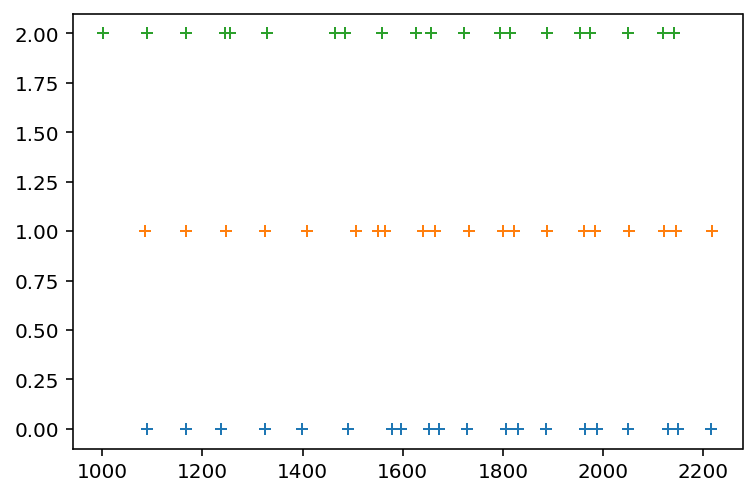

In [22]:
plt.plot(lt[0][:20], [0]*20,'+')
plt.plot(lt[1][:20], [1]*20,'+')
plt.plot(lt[2][:20], [2]*20,'+')